<h3>Introduction</h3>

Spotify is one of the most popular music streaming service in the world. Songs of various styles and genres are published on the platform by both indie and professional artists from all over the world. As an asprirant artist who is intending to publish his/her song on the platform, one might be interested to predict how much popluarity the song is going to get based on its characteristics such tempo, key or loudness. In this analysis, we're going to look into a Spotify song dataset of 160,000 songs to explore the relationship between features of a song and its popularity. A predictive model will then be built to predict how well a song would do on Spotify based on the song's characteristics.

<h3>Dataset</h3>

The dataset is named 'Spotify Dataset 1921-2020, 160k+ Tracks' and was published by user Yamac Eren Ay on Kaggle. Homepage of the dataset where details can be found is accessible <a href = 'https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks'>here</a>. 

It contains more than records of more than 160,000 songs and was collect using Spotify Web API. There are 19 columns in the dataset, description of each column is as follow:
<ul>
    <b>Primary:</b>
    <li><b style="color:Tomato;">id</b>: string value <br>Unique Spotify identifier for each song</p></li>
    <br>
    <b>Numerical:</b>
    <li><b style="color:Tomato;">acousticness</b>: float value ranges from 0 to 1</li>
    Confidence measure of whether the track is acousitc.
    <br>
    <li><b style="color:Tomato;">danceability</b>: float value ranges from 0 to 1</li>
    <br>
    <li><b style="color:Tomato;">energy</b>: float value ranges from 0 to 1</li>
    <br>
    <li>duration_ms: integer value, ~250,000 <br>The duration of the track in milliseconds</li>
    <br>
    <li>instrumentalness (Ranges from 0 to 1)</li>
    <br>
    <li>valence (Ranges from 0 to 1)</li>
    <br>
    <li>popularity (Ranges from 0 to 100)</li>
    <br>
    <li>tempo (Float typically ranging from 50 to 150)</li>
    <br>
    <li>liveness (Ranges from 0 to 1)</li>
    <br>
    <li>loudness (Float typically ranging from -60 to 0)</li>
    <br>
    <li>speechiness (Ranges from 0 to 1)</li>
    <br>
    <li>year (Ranges from 1921 to 2020)</li>
    <br>
    <b>Dummy:</b>
    <li>mode (0 = Minor, 1 = Major)</li>
    <br>
    <li>explicit (0 = No explicit content, 1 = Explicit content)</li>
    <br>
    <b>Categorical:</b>
    <li>key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)</li>
    <br>
    <li>artists (List of artists mentioned)</li>
    <br>
    <li>release_date (Date of release mostly in yyyy-mm-dd format, however precision of date          may vary)</li>
    <br>
    <li>name (Name of the song)</li>
</ul>

Let's take a look at an example record of the song "Radio Ga Ga" by "Queen". Value of 'key' field being 5 indicates that the song is in key F Major. One interesting feature of this song is 'valence' which the song has a score of 0.632. This tells us that the song is musically positive or, in another word, sounds cheerful and upbeat, which is really the case for the song "Radio Ga Ga". Another interesting metric of this song is the 'danceability' score, which it scores an impressive 0.752. This is again understandable since the song, with a simple and catchy beat, is easy to dance to.

It is important to note that these numerical metrics are given to each song using Spotify own model and aren't assigned human so we can assume that scores for different attributes of each song are given fairly consistently. In order to create a test case for a new song, it is important to run this song through Spotify model to get a set of values for features of interest rather than having someone artist to assign scores to the song.

The key data which describe the attributes of a song such as <b>danceability</b>, <b>acousticness</b>, <b>loudness</b>, ... are already in numerical format and are already normalized so that will help a lot in the data wrangling process. Data field such as 'artists' or 'name', though might very well have an impact on the popularity of a song, will not be used in this model since we only want to focus on the muscial virtues of a song.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

spot = pd.read_csv('data.csv')
spot.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [6]:
spot[spot['name']=='Radio Ga Ga']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
84438,0.151,['Queen'],0.752,348173,0.375,0,2jAc9KIQ9XoZxkydXh3MVh,0.000481,5,0.143,-12.966,1,Radio Ga Ga,52,1984-02-27,0.0358,112.415,0.632,1984


In [31]:
col.shape

(221266, 40)

In [30]:
col.dtypes
# Most columns are of 'object' dtype, some feature engineering has to be done to transform these features data into trainable data

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

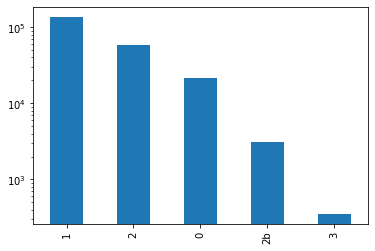

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

In [45]:
col.SEVERITYCODE.value_counts().plot(kind='bar')
plt.yscale('log')
plt.show()
col.SEVERITYCODE.value_counts()

# labels are skewed towards 

<AxesSubplot:>

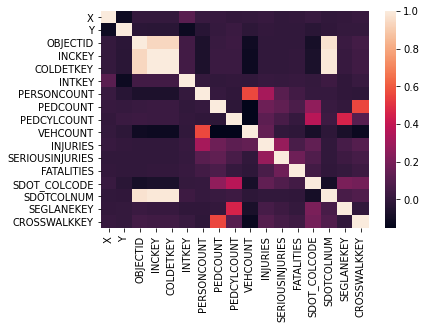

In [50]:
sns.heatmap(col.corr())